In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from scipy import integrate
from scipy import sparse

In [ ]:
dx = 0.002                  # spatial separation
x = np.arange(0, 10, dx)    # spatial grid points

dt = 0.01                   # time interval for snapshots
t0 = 0.0                    # initial time
tf = 2                      # final time
if (dt/dx**2 > 0.1): print('Warning: dt/dx^2 is too big for finite differences method')

# Physics constant
kx = 50                            # wave number
m = 1                              # mass
sigma0 = 0.5                       # width of initial gaussian wave-packet
mu0 = 3.0                          # center of initial gaussian wave-packet
hbar = 1                           # reduced plank constant
A = 1.0 / (sigma0 * np.sqrt(np.pi)) # normalization constant

# Create initial wavefuncition as a Gaussian moving from left to right
psi0 = np.sqrt(A)*np.exp(-0.5*((x-mu0)/sigma0)**2) * np.exp(1j * kx * x)


In [ ]:
# define potentials to use 

def Heaviside(x, x_0=0, V_high=0):
    return np.where(x>x_0, V_high, 0)
    

def barrier(x, a=-1/2, b=1/2, V_high=1):
    if a>=b:
        raise ValueError("b must be greater than a")

    return np.where((x>a) & (x<b), V_high, 0)

Total Probability:  0.9999999999999998


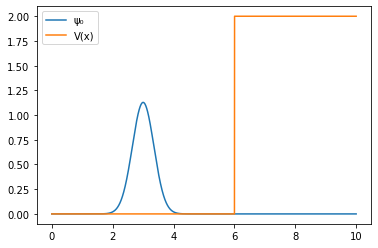

In [ ]:
# Potential V(x)
V_high = 2
x0 = 6
V = Heaviside(x, x_0=x0, V_high=V_high)

# Plot of i.c. & potential
plt.plot(x, np.abs(psi0)**2, label='\u03c8\u2080')
plt.plot(x,V, label='V(x)')
plt.legend()
print("Total Probability: ", np.sum(np.abs(psi0)**2)*dx)

In [ ]:
# Laplace Operator (Finite Difference)
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2
D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [ ]:
# RHS of Schrodinger Equation
# hbar = 1
# hbar = 1.0545718176461565e-34
def psi_t(t, psi):
    return -1j * (- 0.5 * hbar / m * D2.dot(psi) + V / hbar * psi)

In [ ]:
# Solve the Initial Value Problem
# dt = 0.01  # time interval for snapshots
# t0 = 0.0    # initial time
# tf = 2    # final time

t_eval = np.arange(t0, tf, dt)  # recorded time shots
V = Heaviside(x, x_0=6, V_high=0)
# Solve the Initial Value Problem
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_eval, method="RK23")

In [ ]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1731959
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1

Total Prob. in frame 0 = 0.9999999999999998
Total Prob. in frame 1 = 0.9999979323425205
Total Prob. in frame 2 = 0.9999978460937847
Total Prob. in frame 3 = 0.9999977598944426
Total Prob. in frame 4 = 0.9999976736666295
Total Prob. in frame 5 = 0.9999975874760146
Total Prob. in frame 6 = 0.9999975012522649
Total Prob. in frame 7 = 0.9999974150804758
Total Prob. in frame 8 = 0.9999973288578184
Total Prob. in frame 9 = 0.999997242667529
Total Prob. in frame 10 = 0.9999971564878299
Total Prob. in frame 11 = 0.9999970702676795
Total Prob. in frame 12 = 0.9999969840864065
Total Prob. in frame 13 = 0.9999968979056436
Total Prob. in frame 14 = 0.9999968116884306
Total Prob. in frame 15 = 0.9999967255053385
Total Prob. in frame 16 = 0.9999966393310187
Total Prob. in frame 17 = 0.9999965531163575
Total Prob. in frame 18 = 0.9999964669250898
Total Prob. in frame 19 = 0.9999963807575506
Total Prob. in frame 20 = 0.9999962945510767
Total Prob. in frame 21 = 0.9999962083483473
Total Prob. in frame 

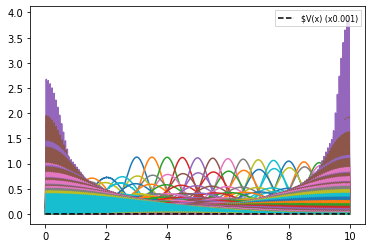

In [ ]:
fig = plt.figure(figsize=(6, 4))
for i, t in enumerate(sol.t):
    plt.plot(x, np.abs(sol.y[:, i])**2)                  # Plot Wavefunctions
    prob_i = np.sum(np.abs(sol.y[:, i])**2)*dx
    if (prob_i < 0.9999): print("Total Prob. in frame", i, "=", prob_i)   # Print Total Probability (Should = 1)
plt.plot(x, V * 0.001, "k--", label=r"$V(x) (x0.001)")   # Plot Potential
plt.legend(loc=1, fontsize=8, fancybox=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


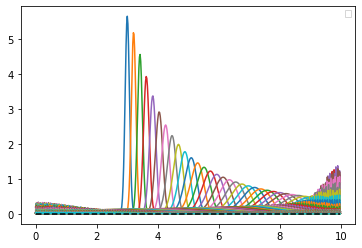

In [ ]:
fig = plt.figure(figsize=(6, 4))
for i, t in enumerate(sol.t):
    plt.plot(x, np.abs(sol.y[:,i])**2)             # Plot Wavefunctions
#     print(np.sum(np.abs(sol.y[:,i])**2)*dx)        # Print Total Probability (Should = 1)
plt.plot(x, V*0.001 , "k--",)   # Plot Potential
plt.legend(loc=1, fontsize=8, fancybox=False)

MovieWriter imagemagick unavailable; using Pillow instead.
Generating GIF


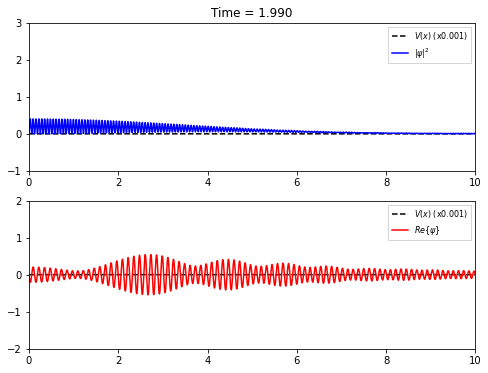

In [ ]:
# HEAVYSIDE EXAMPLE ANIMATION 
# Animation
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(0, 10)
ax1.set_ylim(-1, 3)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(0, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line22, = ax2.plot([], [], "r", label=r"$Re\{ \psi \}$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    line11.set_data(x, V * 0.001)
    line21.set_data(x, V * 0.001)
    return line11, line21


def animate(i):
    line12.set_data(x, np.abs(sol.y[:, i])**2)
    line22.set_data(x, np.real(sol.y[:, i]))
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=200, blit=True)


# Save the animation into a short video
print("Generating GIF")
# anim.save('step@2x.gif', writer='pillow', fps=15)
# anim.save('step@2x.gif', writer='imagemagick', fps=15, dpi=150, extra_args=['-layers Optimize'])
anim.save('step@2x.gif', writer='imagemagick', fps=15, dpi=150)

Generating GIF


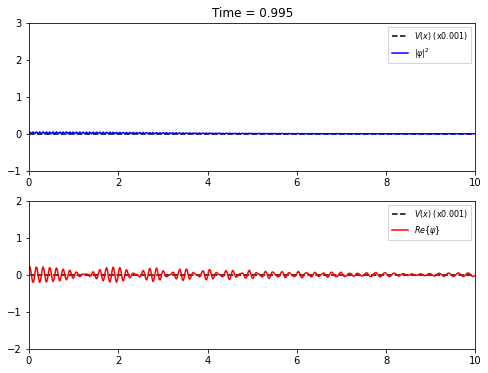

In [ ]:
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(0, 10)
ax1.set_ylim(-1, 3)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(0, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"$V(x)$ (x0.001)")
line22, = ax2.plot([], [], "r", label=r"$Re\{ \psi \}$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    line11.set_data(x, V/1000)
    line21.set_data(x, V/1000)
    return line11, line21


def animate(i):
    line12.set_data(x, np.abs(sol.y[:, i])**2)
    line22.set_data(x, np.real(sol.y[:, i]))
    title.set_text('Time = {0:1.3f}'.format(sol.t[i]))
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(sol.t), interval=200, blit=True)



print("Generating GIF")
anim.save('step@2x.gif', writer='pillow', fps=15)
# anim.save('step@2x.gif', writer='imagemagick', fps=15, dpi=150, extra_args=['-layers Optimize'])
# anim.save('step@2x.gif', writer='imagemagick', fps=15, dpi=150)

In [ ]:
# construct the psi for every time

psi = np.zeros([Nt,Nx])
psi[0] = psi0

In [ ]:
def compute_psi(psi):
    for t in range(0, Nt-1):
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t][i] + 1j/2 * dt/dx**2 * (psi[t][i+1] - 2*psi[t][i] + psi[t][i-1]) - 1j*dt*V[i]*psi[t][i]
        
        normal = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Nx-1):
            psi[t+1][i] = psi[t+1][i]/normal
        
    return psi

In [ ]:
psi_m1 = compute_psi(psi.astype(complex))

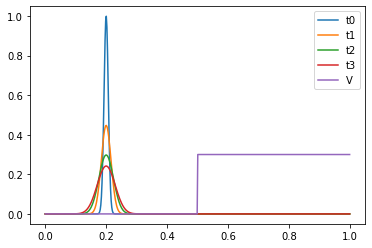

In [ ]:
plt.plot(x, np.absolute(psi_m1[0])**2, label='t0')
plt.plot(x, np.absolute(psi_m1[5000])**2, label='t1')
plt.plot(x, np.absolute(psi_m1[8000])**2, label='t2')
plt.plot(x, np.absolute(psi_m1[9998])**2, label='t3')
plt.plot(x,V, label='V')
plt.legend()

In [ ]:
test = np.linspace(-1,1,100)
barrier(test)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print("Line written in deepnote")

Line written in deepnote


In [ ]:
print("Line written locally")

Line written locally


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=964d390d-0269-41ab-86ee-4ee3752d1778' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>